# 전국 커피빈 매장 현황 Selenium
## 황 성 윤

### 커피빈(Coffee Bean)

- 참조사이트 1 : http://blog.naver.com/PostView.nhn?blogId=pjt3591oo&logNo=221189236488&parentCategoryNo=&categoryNo=116&viewDate=&isShowPopularPosts=true&from=search
- 참조사이트 2 : https://brunch.co.kr/@jk-lab/18
- 참조사이트 3 : http://allselenium.info/mouse-over-actions-using-python-selenium-webdriver/
- 필요한 정보를 crawling 하는 것이 생각보다 어려워서 일단 위의 사이트를 참조해서 crawling을 실시하였음.
- 관리자 권한 cmd에 다음 명령어 입력 : pip install selenium

In [92]:
import bs4
import requests as rq

cfbean = rq.get('https://www.coffeebeankorea.com/store/store.asp')
st_cb = bs4.BeautifulSoup(cfbean.text, 'lxml')
st_cb.find_all('li', class_='storeListUL')

[]

In [71]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import time

# 설치된 크롬 버전에 맞는 ChromeDriver 설치 후 진행
# https://sites.google.com/a/chromium.org/chromedriver/home
chromedriver_dir = r'C:\Users\709-000\ChromeWebDriver\chromedriver.exe'
driver = webdriver.Chrome(chromedriver_dir)
time.sleep(3)

In [72]:
# 홈페이지 접속
driver.get('https://www.coffeebeankorea.com/store/store.asp')
# 마우스포인터 제어
action = ActionChains(driver)
time.sleep(3)

In [73]:
# 지역검색 버튼 클릭
local = driver.find_element_by_xpath('//*[@id="contents2"]/div[1]/div[2]/div[3]/h3[2]/a')
action.move_to_element(local).perform()
local.click()
time.sleep(3)

In [86]:
# 시/도 버튼 클릭
sido = driver.find_element_by_xpath('//*[@id="localTitle"]')
action.move_to_element(sido).perform()
sido.click()
time.sleep(3)

In [87]:
# 서울 클릭
li = driver.find_element_by_xpath('//*[@id="storeLocal"]/li[1]/a')
li.click()
time.sleep(3)

In [88]:
# 정보 가져오기
import bs4
source = driver.page_source
bs = bs4.BeautifulSoup(source, 'lxml')
entire = bs.find('ul', id='storeListUL')
li_list = entire.find_all('li')
for infor in li_list:
    print(infor.find('p', class_='address').text)

 서울특별시 서초구 반포대로70 
 서울 서초구 서초중앙로 156, 1층 
 서울시 중구 장충동2가 188-11, 188-4, 188-5 
  서울특별시 송파구 올림픽로35길 123 1층 
 서울시 종로구 우정국로 26 센트로폴리스 1층 Retail 1-5,6 
 서울시 마포구 와우산로10길 3, 엘케이빌딩 1~3층 
 서울특별시 종로구 종로3길 34 
 서울시 동대문구 경희대로 10 (회기동) 
 서울특별시 송파구 법원로6길 11 환인빌딩 1층  
 서울특별시 종로구 새문안로 91 고려빌딩 1,2층  
 서울특별시 강남구 선릉로 433 세방빌딩 1층 
 서울시 용산구 한강대로95 
 서울시 영등포구 국제금융로10 IFC Mall L2(2층) 
 서울 송파구 방이동 206-11 
 서울특별시 강서구 마곡동로 55 마커스빌딩 1층 
 서울특별시 강서구 강서로 457(마곡동) 
 서울시 은평구 은평로 121(응암동), 메디컬빌딩 
 서울특별시 마포구 양화로 196(동교동) 
 서울특별시 강남구  강남대로112길 20 1층, 2층 
 서울특별시 강남구 도곡로 408 디마크빌딩 1층 
 서울특별시 성북구 삼선교로 12 1층 
 서울특별시 종로구 대학로 128 2층 
 서울시 송파구 위례광장로 230 위례2차 아이파크 B동 1층 
 서울시 서초구 강남대로 475 2층 
 서울특별시 마포구 월드컵로 3길 14, 푸르지오 2차 1층 
 서울특별시 송파구 충민로 66 가든파이브 라이프동 테크노관 1층 
 서울특별시 영등포구 국제금융로8길31 여의도SK증권빌딩점 1층 
 서울특별시 광진구 구의강변로 106 삼성쉐르빌 1층 
 서울특별시 강북구 한천로 139길 25, 1층 일부 및 2층 (수유동 191-70) 
 서울특별시 강남구 도곡동 543-1, 지오빌딩 B1층 
 서울시 송파구 방이동 44-2, 장은빌딩 1층 
 서울시 종로구 종로 70 2층 
 서울시 마포구 독막로 13, 2층 
 서울시 노원구 노해로 490, 길빌딩 2층 
 서울특별시 강동구 동남로 885 양지빌딩 1

In [95]:
### crawling
coffeebean_address = []

for i in range(1,14):
    
    chromedriver_dir = r'C:\Users\709-000\ChromeWebDriver\chromedriver.exe'
    driver = webdriver.Chrome(chromedriver_dir)
    time.sleep(3)
    driver.maximize_window()
    
    # 홈페이지 접속
    driver.get('https://www.coffeebeankorea.com/store/store.asp')
    time.sleep(0.5)
    
    # 마우스포인터 제어
    action = ActionChains(driver)
    time.sleep(0.5)
    
    # 지역검색 버튼 클릭
    local = driver.find_element_by_xpath('//*[@id="contents2"]/div[1]/div[2]/div[3]/h3[2]/a')
    action.move_to_element(local).perform()
    local.click()
    time.sleep(0.5)
    
    # 시/도 버튼 클릭
    sido = driver.find_element_by_xpath('//*[@id="localTitle"]')
    action.move_to_element(sido).perform()
    sido.click()
    time.sleep(0.5)
    
    # 도시 클릭
    a = '//*[@id="storeLocal"]/li['
    b = ']/a'
    li = driver.find_element_by_xpath(a + str(i) + b)
    li.click()
    time.sleep(0.5)
    
    # 정보 가져오기
    import bs4
    source = driver.page_source
    bs = bs4.BeautifulSoup(source, 'lxml')
    entire = bs.find('ul', id='storeListUL')
    li_list = entire.find_all('li')
    for infor in li_list:
        coffeebean_address.append(infor.find('p', class_='address').text)

In [97]:
len(coffeebean_address)

153

In [98]:
import pandas as pd
import numpy as np

coffeebean = pd.DataFrame({'주소' : coffeebean_address})
coffeebean['커피빈입점'] = 1

In [99]:
coffeebean.to_csv('data/coffeebean.csv', encoding='EUC-KR', sep=',')

In [100]:
# 데이터 처리 후 다시 올리기
coffeebean = pd.read_csv("data/coffeebean.csv", encoding='EUC-KR', sep=',')
coffeebean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
주소       153 non-null object
커피빈입점    153 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [101]:
len(coffeebean['주소'])

153

In [102]:
coffeebean['주소'][0].split(' ')

['', '서울특별시', '서초구', '반포대로70', '']

In [103]:
city1 = [] # 광역시도
city2 = [] # 시도

for i in range(len(coffeebean['주소'])):
    addr = coffeebean['주소'][i].split(' ')
    city1.append(addr[1])
    city2.append(addr[2])
    
len(city1), len(city2)  

(153, 153)

In [104]:
coffeebean['광역시도'] = city1
coffeebean['시도'] = city2
coffeebean.to_csv("data/coffeebean.csv", encoding='EUC-KR', sep=',')
coffeebean.head()

,주소,커피빈입점,광역시도,시도
0,서울특별시 서초구 반포대로70,1,서울특별시,서초구
1,"서울특별시 서초구 서초중앙로 156, 1층",1,서울특별시,서초구
2,"서울특별시 중구 장충동2가 188-11, 188-4, 188-5",1,서울특별시,중구
3,서울특별시 송파구 올림픽로35길 123 1층,1,서울특별시,송파구
4,"서울특별시 종로구 우정국로 26 센트로폴리스 1층 Retail 1-5,6",1,서울특별시,종로구


In [106]:
# 피벗테이블
coffeebean_enter = pd.pivot_table(coffeebean, index = ['광역시도', '시도'],
                      values = ['커피빈입점'], aggfunc = 'sum')

In [107]:
coffeebean_enter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58 entries, (강원도, 원주시) to (충청북도, 청주시)
Data columns (total 1 columns):
커피빈입점    58 non-null int64
dtypes: int64(1)
memory usage: 1.3+ KB


In [108]:
coffeebean_enter.reset_index(inplace=True) 
coffeebean_enter.head()

,광역시도,시도,커피빈입점
0,강원도,원주시,1
1,경기도,고양시,7
2,경기도,광명시,1
3,경기도,구리시,1
4,경기도,군포시,1


In [109]:
coffeebean_enter.to_csv("data/coffeebean_enter.csv", encoding='EUC-KR', sep=',')

In [110]:
si_name = [None] * len(coffeebean_enter)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [111]:
for n in coffeebean_enter.index:
    if coffeebean_enter['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if coffeebean_enter['시도'][n][:-1]=='고성' and coffeebean_enter['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif coffeebean_enter['시도'][n][:-1]=='고성' and coffeebean_enter['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = coffeebean_enter['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if coffeebean_enter['시도'][n] in values:
                if len(coffeebean_enter['시도'][n])==2:
                    si_name[n] = keys + ' ' + coffeebean_enter['시도'][n]
                elif coffeebean_enter['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + coffeebean_enter['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + coffeebean_enter['시도'][n][:-1]
        
    elif coffeebean_enter['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(coffeebean_enter['시도'][n])==2:
            si_name[n] = coffeebean_enter['광역시도'][n][:2] + ' ' + coffeebean_enter['시도'][n]
        else:
            si_name[n] = coffeebean_enter['광역시도'][n][:2] + ' ' + coffeebean_enter['시도'][n][:-1]

In [112]:
coffeebean_enter['ID'] = si_name
coffeebean_enter.head()

,광역시도,시도,커피빈입점,ID
0,강원도,원주시,1,원주
1,경기도,고양시,7,고양
2,경기도,광명시,1,광명
3,경기도,구리시,1,구리
4,경기도,군포시,1,군포


In [113]:
coffeebean_enter.to_csv("data/coffeebean_enter.csv", encoding='EUC-KR', sep=',')

In [114]:
draw_korea_raw = pd.read_excel('data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack()) 
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)
draw_korea = draw_korea_raw_stacked
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [115]:
set(draw_korea['ID'].unique()) - set(coffeebean_enter['ID'].unique())

{'가평',
 '강릉',
 '강진',
 '거제',
 '거창',
 '경산',
 '계룡',
 '고령',
 '고성(강원)',
 '고성(경남)',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '고창',
 '고흥',
 '곡성',
 '공주',
 '과천',
 '광양',
 '광주',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '괴산',
 '구례',
 '구미',
 '군산',
 '군위',
 '금산',
 '김제',
 '김천',
 '김해',
 '나주',
 '남원',
 '남해',
 '논산',
 '단양',
 '담양',
 '당진',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대전 대덕',
 '대전 동구',
 '대전 유성',
 '대전 중구',
 '동두천',
 '동해',
 '목포',
 '무안',
 '무주',
 '문경',
 '밀양',
 '보령',
 '보성',
 '보은',
 '봉화',
 '부산 강서',
 '부산 금정',
 '부산 남구',
 '부산 동구',
 '부산 동래',
 '부산 북구',
 '부산 사상',
 '부산 사하',
 '부산 서구',
 '부산 연제',
 '부산 영도',
 '부안',
 '부여',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '사천',
 '산청',
 '삼척',
 '상주',
 '서귀포',
 '서산',
 '서울 금천',
 '서울 도봉',
 '서울 동작',
 '서울 성동',
 '서천',
 '성남 분당',
 '성남 수정',
 '성남 중원',
 '성주',
 '속초',
 '수원 권선',
 '수원 영통',
 '수원 장안',
 '수원 팔달',
 '순창',
 '순천',
 '시흥',
 '신안',
 '아산',
 '안동',
 '안산 단원',
 '안산 상록',
 '안성',
 '안양 동안',
 '안양 만안',
 '양구',
 '양산',
 '양양',
 '양주',
 '양평',
 '여수',
 '여주',
 '연천',
 '영광',
 '영덕',
 '영동',
 '영암',


In [116]:
set(coffeebean_enter['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안양', '용인', '창원', '천안', '청주', '포항'}

In [117]:
coffeebean_enter = pd.merge(coffeebean_enter, draw_korea, how='right', on=['ID'])
coffeebean_enter = coffeebean_enter.fillna(0)
coffeebean_enter.to_csv("data/coffeebean_enter.csv", encoding='EUC-KR', sep=',')
coffeebean_enter.head()

,광역시도,시도,커피빈입점,ID,y,x
0,강원도,원주시,1.0,원주,5,10
1,경기도,광명시,1.0,광명,4,4
2,경기도,구리시,1.0,구리,3,8
3,경기도,군포시,1.0,군포,9,5
4,경기도,김포시,2.0,김포,3,4


In [118]:
mapdata = coffeebean_enter.pivot_table(index='y', columns='x', values='커피빈입점')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,2.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN
4,NaN,NaN,0.0,0.0,1.0,1.0,5.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN
5,NaN,0.0,0.0,0.0,1.0,7.0,3.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN
6,NaN,0.0,0.0,0.0,3.0,0.0,2.0,1.0,11.0,1.0,0.0,0.0,NaN,NaN
7,NaN,0.0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,NaN,NaN,1.0,0.0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [119]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# 그림 그리는 함수
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계를 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

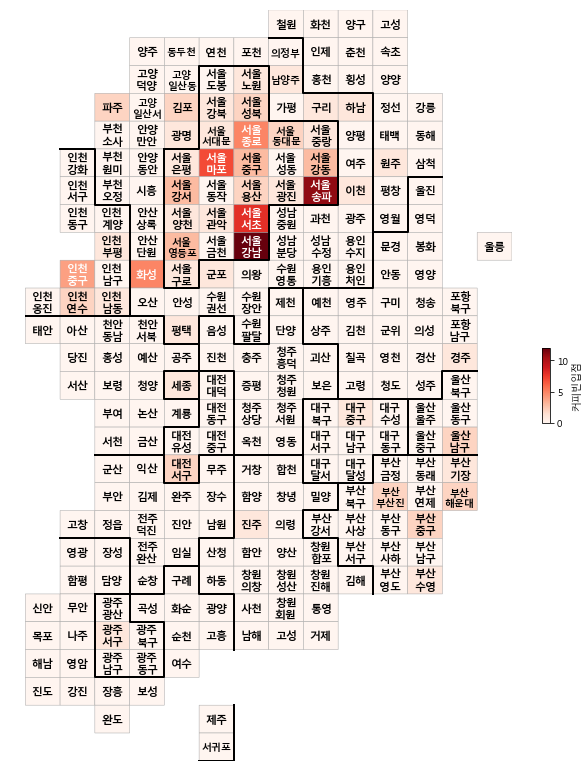

In [120]:
drawKorea('커피빈입점', coffeebean_enter, 'Reds')